In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.feature_selection import SelectFromModel


In [2]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\bank.csv",sep=';')


In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.replace('unknown',np.NaN,inplace=True)

In [5]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()


In [8]:
df.drop(['marital', 'contact','month','day_of_week','duration',], axis=1,inplace=True)




In [9]:
df.dropna(subset=['job'],inplace=True)



In [10]:
df.isnull().sum()

age                  0
job                  0
education         1600
default           8445
housing            985
loan               985
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [11]:
df['education'].value_counts()

university.degree      12123
high.school             9478
basic.9y                6014
professional.course     5231
basic.4y                4124
basic.6y                2270
illiterate                18
Name: education, dtype: int64

In [12]:
df['education'].fillna('university.degree',inplace=True)


In [13]:
df.isnull().sum()

age                  0
job                  0
education            0
default           8445
housing            985
loan               985
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [14]:
df.head()

,age,job,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,basic.4y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,high.school,NaN,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,high.school,no,yes,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,basic.6y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,high.school,no,no,yes,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
df['default'].fillna(df['default'].mode(), inplace=True)


In [16]:
df.isnull().sum()

age                  0
job                  0
education            0
default           8445
housing            985
loan               985
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [17]:
df['housing'].value_counts()


yes    21404
no     18469
Name: housing, dtype: int64

In [18]:
df.isnull().sum()

age                  0
job                  0
education            0
default           8445
housing            985
loan               985
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [19]:
df['housing'].fillna('yes',inplace=True)


In [20]:
df.isnull().sum()

age                  0
job                  0
education            0
default           8445
housing              0
loan               985
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [21]:
df['loan'].value_counts()


no     33682
yes     6191
Name: loan, dtype: int64

In [22]:
df['loan'].fillna('no',inplace=True)


In [23]:
df.isnull().sum()

age                  0
job                  0
education            0
default           8445
housing              0
loan                 0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [24]:
df['default'].value_counts()

no     32410
yes        3
Name: default, dtype: int64

In [26]:
df['default'].fillna('no',inplace=True)


In [27]:
df['y'].value_counts()

no     36255
yes     4603
Name: y, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40858 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40858 non-null  int64  
 1   job             40858 non-null  object 
 2   education       40858 non-null  object 
 3   default         40858 non-null  object 
 4   housing         40858 non-null  object 
 5   loan            40858 non-null  object 
 6   campaign        40858 non-null  int64  
 7   pdays           40858 non-null  int64  
 8   previous        40858 non-null  int64  
 9   poutcome        40858 non-null  object 
 10  emp.var.rate    40858 non-null  float64
 11  cons.price.idx  40858 non-null  float64
 12  cons.conf.idx   40858 non-null  float64
 13  euribor3m       40858 non-null  float64
 14  nr.employed     40858 non-null  float64
 15  y               40858 non-null  object 
dtypes: float64(5), int64(4), object(7)
memory usage: 5.3+ MB


# Insights

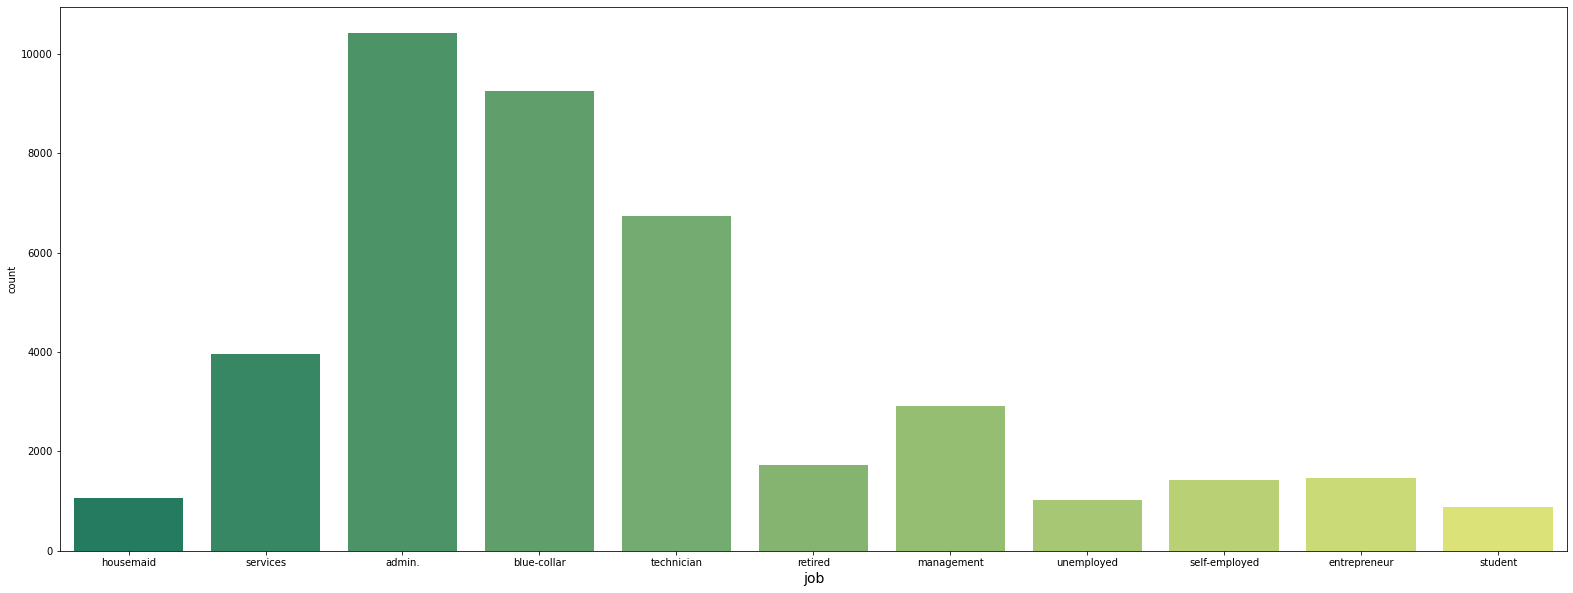

In [29]:
plt.figure(figsize=(27,10))
sns.countplot(x='job' , data=df ,palette='summer')
plt.xlabel('job', fontsize=14)
plt.show()

The job role admin is more in strength

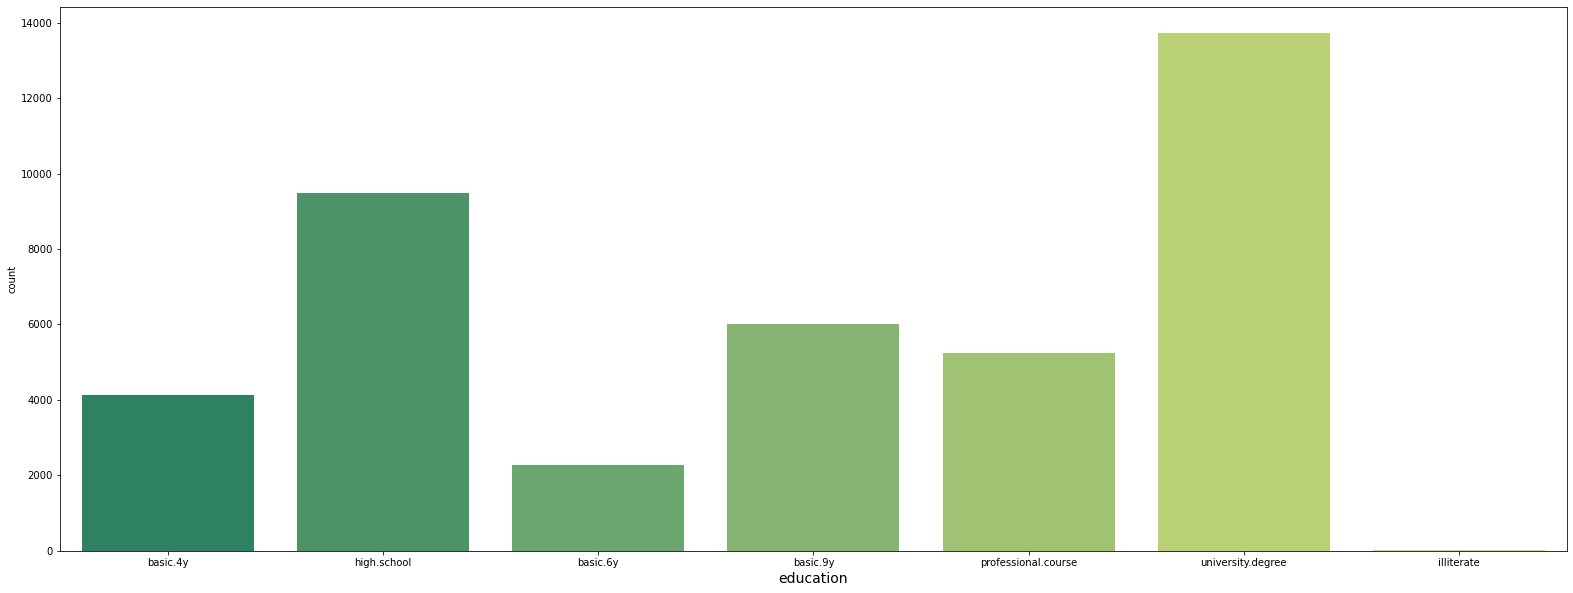

In [30]:
plt.figure(figsize=(27,10))
sns.countplot(x='education' , data=df ,palette='summer')
plt.xlabel('education', fontsize=14)
plt.show()

Most of them done University Degree

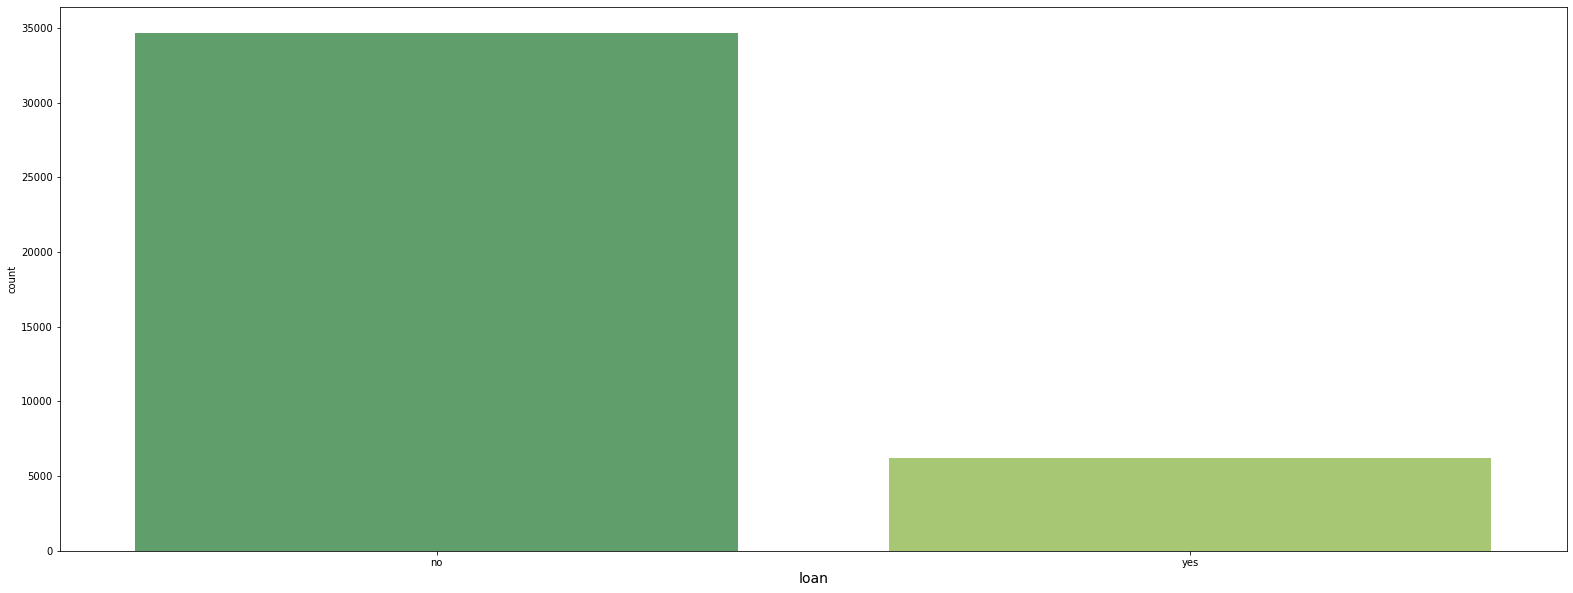

In [31]:
plt.figure(figsize=(27,10))
sns.countplot(x='loan' , data=df ,palette='summer')
plt.xlabel('loan', fontsize=14)
plt.show()

Most of customers doesn't have any personel loan

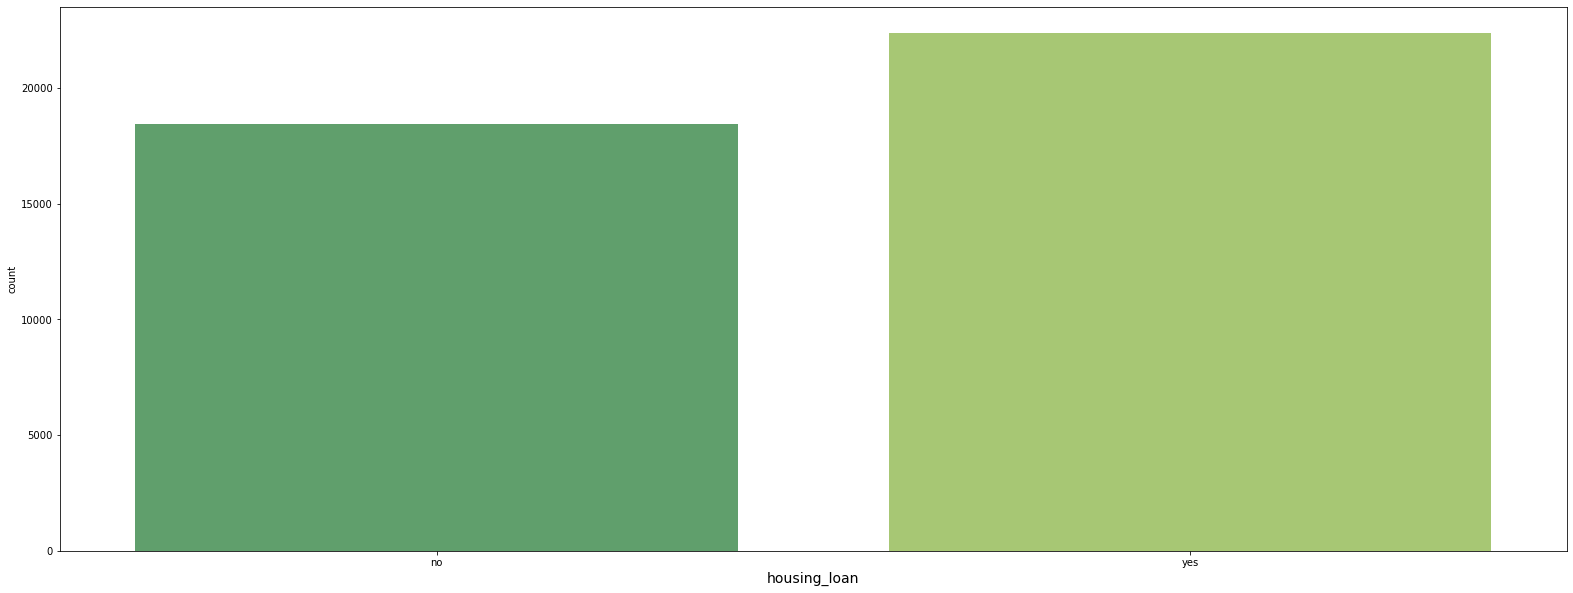

In [33]:
plt.figure(figsize=(27,10))
sns.countplot(x='housing' , data=df ,palette='summer')
plt.xlabel('housing_loan', fontsize=14)
plt.show()

Here, there is a twist, most of customers have housing loan

In [43]:
#filtering the Accepted data
accepted_df=df[df['y']=='yes']

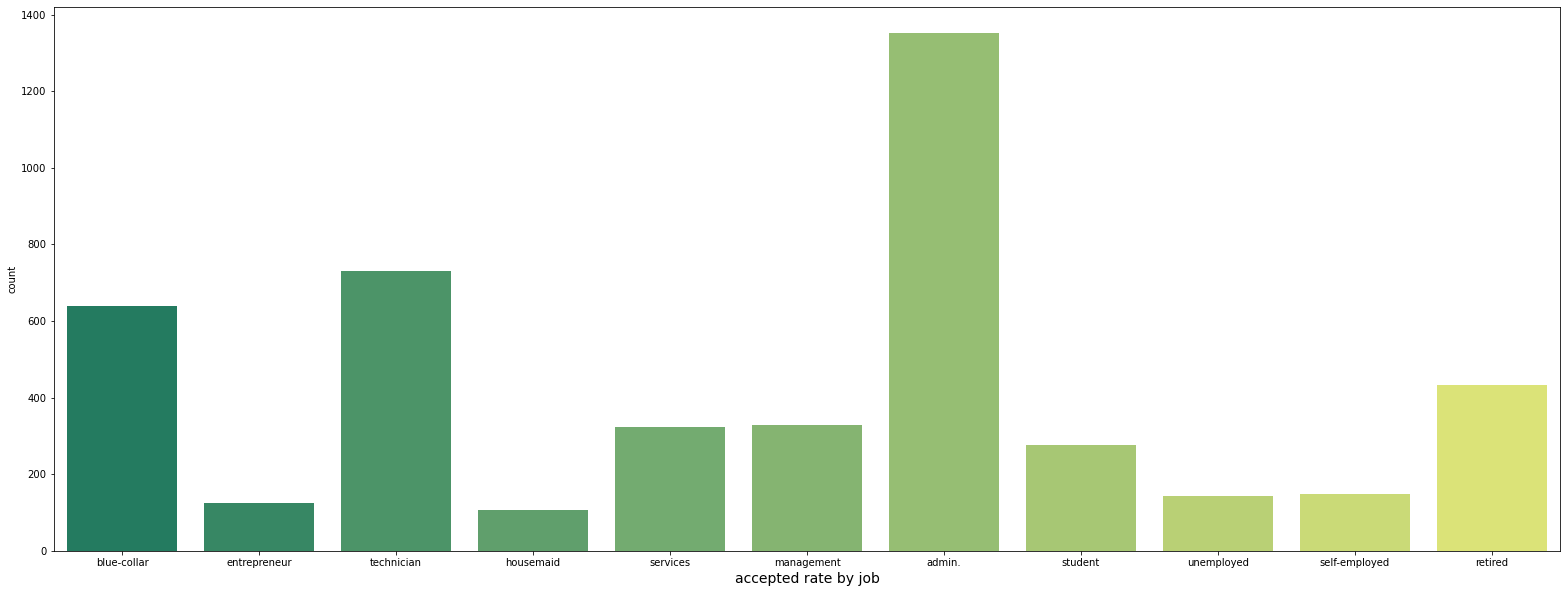

In [44]:
plt.figure(figsize=(27,10))
sns.countplot(x='job' , data=accepted_df ,palette='summer')
plt.xlabel('accepted rate by job', fontsize=14)
plt.show()

so from this we can know that customers those who are working as admin mostly accepted the term deposit plan and some customers who works as technician and including some retired people 

An important information that is 

The customers those who are entrepreneurs are less likely to deposit in banks they may have other investing ideas,so the bank employees can stop putting their marketing efforts on customers those who are running their own business 

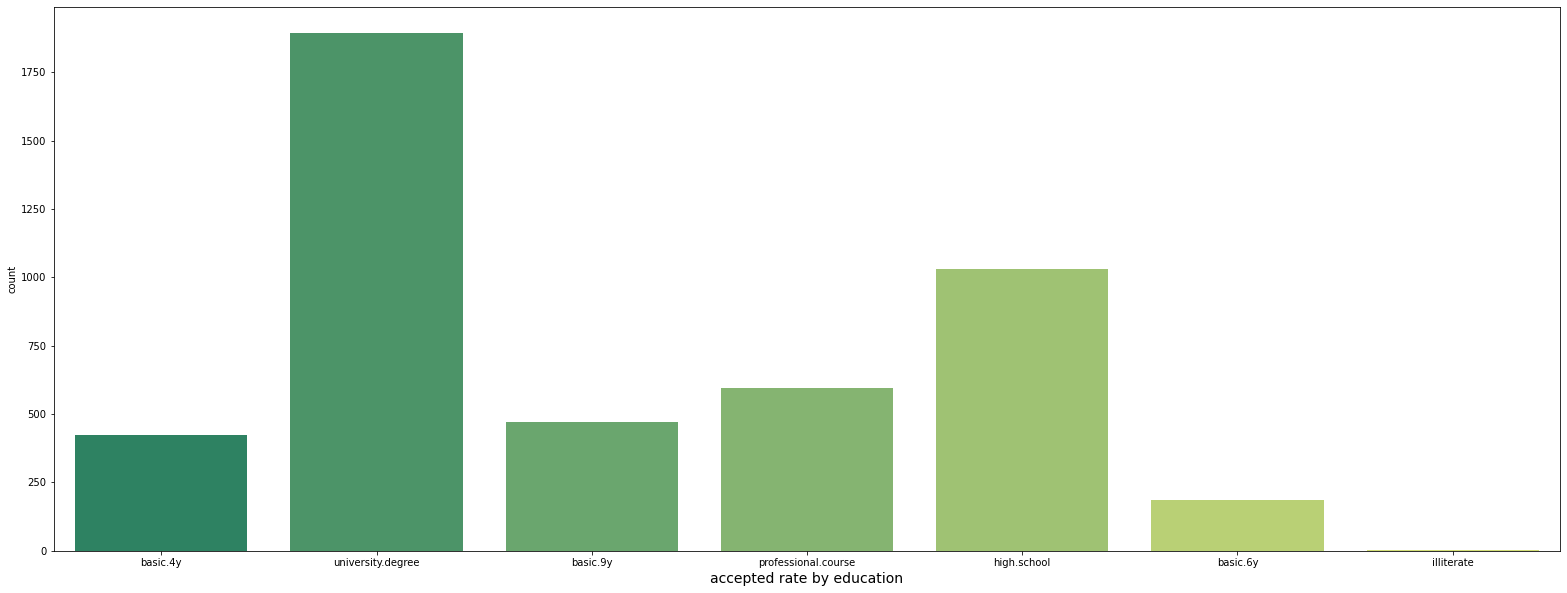

In [45]:
plt.figure(figsize=(27,10))
sns.countplot(x='education' , data=accepted_df ,palette='summer')
plt.xlabel('accepted rate by education', fontsize=14)
plt.show()

The customers those who done University Degree are more likely to deposit in the bank

# Feature Engineering

In [28]:
label_encoder = LabelEncoder()

df['job'] = label_encoder.fit_transform(df['job'])

In [29]:
df.head()

,age,job,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,basic.4y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,high.school,NaN,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,high.school,no,yes,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,basic.6y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,high.school,no,no,yes,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
label_encoder = LabelEncoder()

df['education'] = label_encoder.fit_transform(df['education'])

In [31]:
df['default'] = label_encoder.fit_transform(df['default'])

In [32]:
df['housing'] = label_encoder.fit_transform(df['housing'])

In [33]:
df['loan'] = label_encoder.fit_transform(df['loan'])

In [34]:
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

In [35]:
df.head()

,age,job,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,3,2,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,3,0,1,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,0,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,3,0,0,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [37]:
x.head()

,age,job,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,0,0,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,3,2,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,3,0,1,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,0,0,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,3,0,0,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [38]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

# Model Building

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [41]:
sel.get_support()


array([ True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False])

In [42]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

5

In [43]:
print(selected_feat)

Index(['age', 'job', 'education', 'campaign', 'euribor3m'], dtype='object')


In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [45]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)


In [46]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'no': 25382, 'yes': 3218})
After SMOTE : Counter({'no': 25382, 'yes': 25382})


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_smote = sc.fit_transform(X_train_smote)
X_test = sc.transform(X_test)

In [48]:
model = LogisticRegression()


In [49]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.782019905367923


In [50]:
from sklearn.ensemble import AdaBoostClassifier
m2 = AdaBoostClassifier(n_estimators=100, random_state=42)
m2.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [51]:
y1_predict = m2.predict(X_test)

print(accuracy_score(y_test,y1_predict))

0.8829335943873389


In [52]:
gnb = GaussianNB()

In [53]:
gnb.fit(X_train_smote,y_train_smote)

GaussianNB()

In [54]:
 y_pred = gnb.predict(X_test)

In [55]:
nav=metrics.accuracy_score(y_test,y_pred)

In [56]:
nav

0.7581171479849894

In [57]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train_smote,y_train_smote)
y1_pred = clf.predict(X_test)


In [58]:
y1_pred

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [59]:
print(accuracy_score(y_test,y1_pred))

0.7202643171806168
